### Подключение библиотек и пакетов

In [1]:
import numpy as np
import pandas as pd
import os
from time import time

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Настройка глобальных переменных

In [2]:
if 'google.colab' in str(get_ipython()):
    data_dir = os.path.join(os.getcwd(), '/content/data/car_price')
else:
    data_dir = os.path.join(os.getcwd(), '../../../data/car_price')


img_dir = os.path.join(os.getcwd(), 'img_data_preproccecing')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

## Настройка pandas

In [3]:
# установка максимального количества столбцов и строк для вывода
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 25)

# установка количества знаков после запятой
pd.set_option("precision", 2)

## Просмотр первичных (сырых) данных

Загрузка данных с репозитория и чтение данных

In [4]:
if 'google.colab' in str(get_ipython()):
    !pip install rm
    !pip install wget
    !pip install gzip-reader
    !rm -r /content/data
    !wget -P data/car_price https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price.csv

Чтение данных

In [5]:
df = pd.read_csv(os.path.join(data_dir, 'car_price.csv'))
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


Вывод основной информации по набору данных

In [6]:
print(f'Количество строк: {df.shape[0]}')
print(f'Количество столбцов: {df.shape[1]}')
print(f'Вывод общей информации по датафрейму и признакам:\n')
print(df.info())

Количество строк: 4800
Количество столбцов: 8
Вывод общей информации по датафрейму и признакам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB
None


Описания признаков:

|Название|Перевод|Тип данных|Тип признака|
|---|---|---|---|
|model|Модель|Строка|Категриальный|
|body|Тип кузова|Строка|Категориальный|
|color|Цвет кузова|Строка|Категориальный|
|km|Пробег в км.|Число|Количественный|
|transmission|Тип КПП|Строка|Категориальный|
|extras|Дополнительные опции|Строка|Категориальный|
|price|Стоимость|Число|Количественный|

Вывод основных статистических характеристик по числовым признакам

In [7]:
df.describe()

,km,hp,price
count,4800.00,4800.0,4800.00
mean,31912.91,85.0,19722.87
std,35899.45,0.0,4337.52
min,0.00,85.0,5555.00
25%,4700.00,85.0,15990.00
50%,20005.00,85.0,19588.00
75%,47800.00,85.0,22692.50
max,291800.00,85.0,56100.00


## Предварительная обработка данных  (Data Preprocessing)

Видно, что признак 'hp' (мощность) у всех объектов имеет одно и то же значение. Следовательно, данный признак неинформативный, и его можно удалить

In [8]:
df.drop(['hp'], axis=1, inplace=True)

Переименуем признаки на более удобо-читаемые названия

In [9]:
df.columns = ['model', 'body', 'color', 'km', 'transmission', 'extras', 'price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         4800 non-null   object
 1   body          4800 non-null   object
 2   color         4800 non-null   object
 3   km            4800 non-null   int64 
 4   transmission  4800 non-null   object
 5   extras        4800 non-null   object
 6   price         4800 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.6+ KB


По выведенной информации выше видно, что данные не имеют пропусков. Сначала выведем график отношений признаков друг с другом

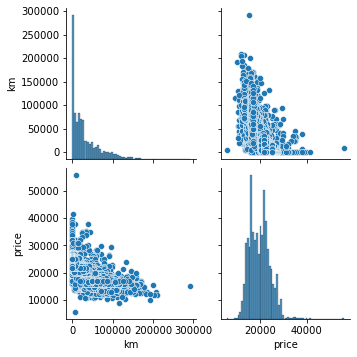

In [10]:
# вывод графика отношений признаков друг с другом числовых признаков
sns.pairplot(df)
plt.savefig(os.path.join(img_dir, 'Car Price Prediction. Features Pair Plot.png'))

Видно, что признак `km` (пробег автомобиля) отрицательно коррелирует с целевым признаком `price` (стоимость). Узнаем насколько сильна корреляция 

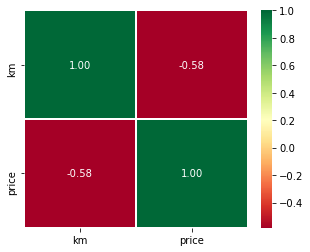

In [11]:
# Визуализация матрицы корреляции: построение корреляционной карты
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", linewidths=.5, fmt= '.2f',ax=ax);
plt.savefig(os.path.join(img_dir, 'Car Price Prediction. Features Corellation Matrix.png'))

Выведем статистику по нечисловым признакам

In [12]:
df.describe(include=["object", "bool"])

,model,body,color,transmission,extras
count,4800,4800,4800,4800,4800
unique,3,7,13,3,325
top,Audi A3,Sedans,Black,Manual,Alloy wheels
freq,2642,3495,1443,2435,1717


Посмотрим распределение значений для признака 'model'

In [13]:
df["model"].value_counts()

Audi A3    2642
Audi A1    2157
Audi A2       1
Name: model, dtype: int64

Удаляем запись с Audi A2, т.к. имеется всего одна запись с ней

In [14]:
df = df.drop(df[df['model'] == 'Audi A2'].index)

Запишем в отдельную переменную вектор ответов (целевых признаков)

In [15]:
target = df["price"].values

Сохраним значения агрегированных функций для категориалных признаков относительно цены

In [16]:
features = ['model', 'body', 'color', 'transmission']
features_info = {
    feature: {
        'uniques': df[feature].unique(),
        'mean': [df.loc[df[feature] == val, 'price'].mean() for val in df[feature].unique()],
        'std': [df.loc[df[feature] == val, 'price'].std() for val in df[feature].unique()],
        'count': [df.loc[df[feature] == val, 'price'].count() for val in df[feature].unique()]
    } for feature in features
}

Выводим список цветов машин

In [17]:
df['color'].unique()

array(['Black', 'Red', 'Brown', 'White', 'Grey', 'Blue', 'Silver',
       'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange'],
      dtype=object)

Выводим график разброса машин относительно пробега и стоимости с выделением цвета машины

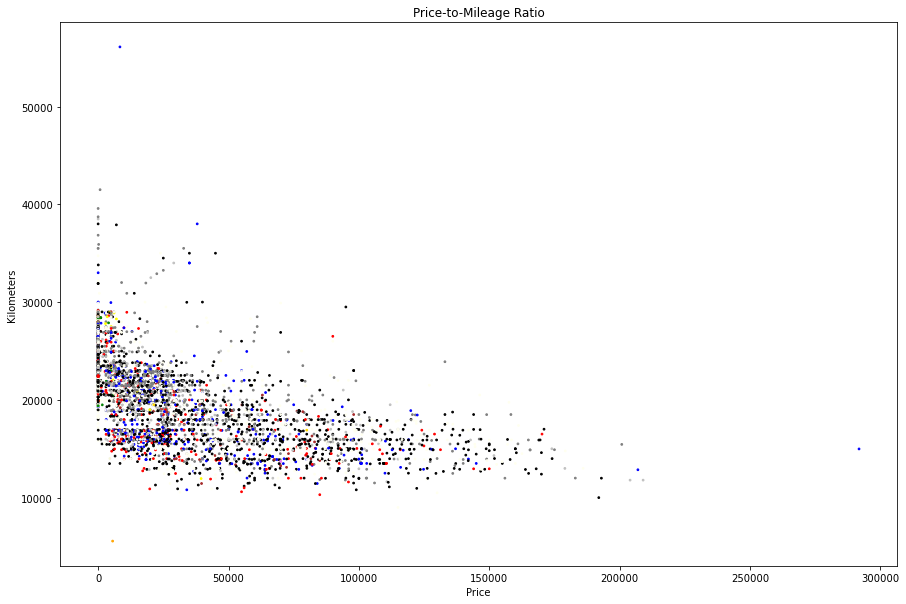

In [18]:
# словарь для маппинга цветов
colors_map = {
    'Black': 'black', 'Red': 'red', 'Brown': 'brown', 'White': 'ivory', 'Grey': 'grey', 'Blue': 'blue', 'Silver': 'silver',
    'Beige': 'beige', 'Violet': 'violet', 'Yellow': 'yellow', 'Green': 'green', 'Bronze': 'gold', 'Orange': 'orange'
}

fig, km_to_price = plt.subplots(figsize=(15, 10))
# kms = df['km'].values
# print(kms)
km_to_price.scatter(df['km'], df['price'],  s=3, c=df['color'].map(colors_map))
km_to_price.set_ylabel('Kilometers')
km_to_price.set_xlabel('Price')
km_to_price.set_title('Price-to-Mileage Ratio')
plt.savefig(os.path.join(img_dir, 'Car Price Prediction. Price-to-Mileage Ratio.png'))
plt.show()

Заменяем значения категориальных признаков на новые бинарные признаки

In [19]:
df = pd.get_dummies(df, columns=['model', 'body', 'color', 'transmission'])
columns = df.columns.values
df.rename({column: column.split("_")[-1] for column in columns}, axis="columns", inplace=True)

extras = df['extras'].str.get_dummies(",")
df.drop(columns=['extras'], inplace=True)
df = pd.concat([df, extras], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4799
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   km                   4799 non-null   int64
 1   price                4799 non-null   int64
 2   Audi A1              4799 non-null   uint8
 3   Audi A3              4799 non-null   uint8
 4   Compact              4799 non-null   uint8
 5   Convertible          4799 non-null   uint8
 6   Coupe                4799 non-null   uint8
 7   Other                4799 non-null   uint8
 8   Sedans               4799 non-null   uint8
 9   Station wagon        4799 non-null   uint8
 10  Beige                4799 non-null   uint8
 11  Black                4799 non-null   uint8
 12  Blue                 4799 non-null   uint8
 13  Bronze               4799 non-null   uint8
 14  Brown                4799 non-null   uint8
 15  Green                4799 non-null   uint8
 16  Grey                 479

Выведем графики средней цены автомобиля с учетом типа кузова, цвета, трансмиссии и модели

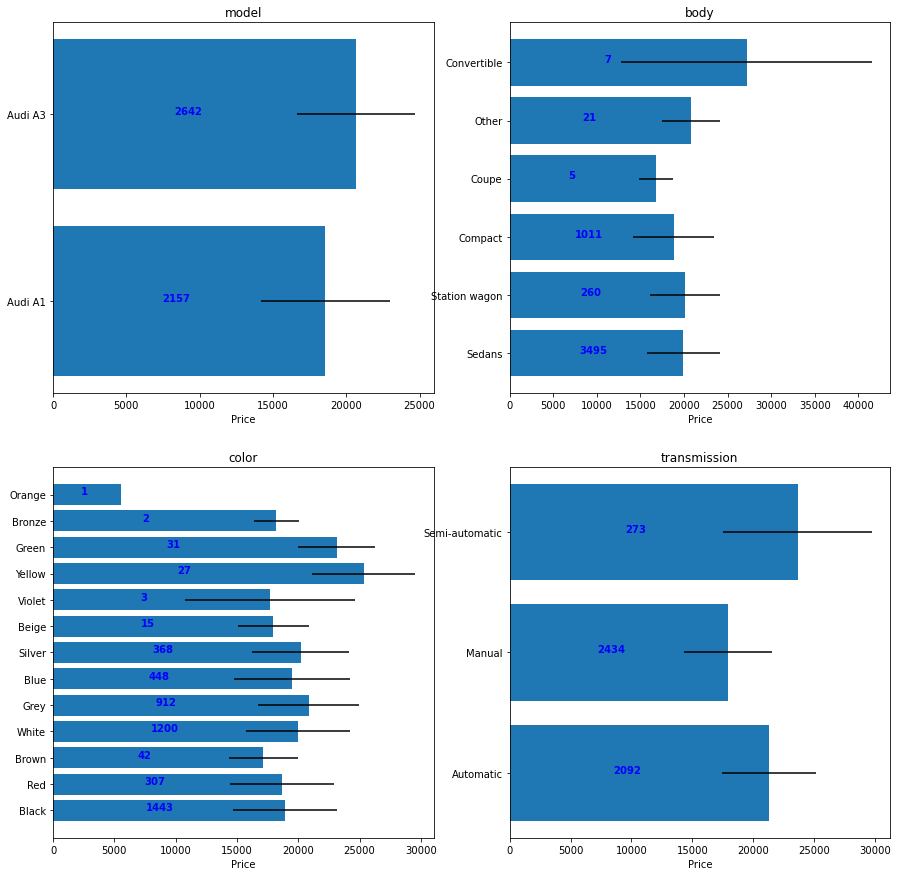

In [20]:
from math import floor

fig, axes = plt.subplots(2, len(features) // 2, figsize=(15,15))
for i, feature in enumerate(features_info):
  axes[floor(i // 2), i % 2].set_title(feature)
  axes[floor(i // 2), i % 2].set_xlabel('Price')
  axes[floor(i // 2), i % 2].barh(y=features_info[feature]['uniques'],
                                  width=features_info[feature]['mean'],
                                  xerr=features_info[feature]['std'])
  for j, v in enumerate(features_info[feature]['count']):
    axes[floor(i // 2), i % 2].text(features_info[feature]['mean'][j] / 2.5, j, 
                                  f'{v}', color='blue', fontweight='bold')
# fig = plt.figure(frameon=False, facecolor='w')
plt.savefig(os.path.join(img_dir, 'Car Price Prediction. Price-Features-Count Ratio.png'))
plt.show()

Запишем данные, прошедшие предобработку в отдельный файл

In [21]:
df.to_csv(os.path.join(data_dir, 'car_price_prepocessed.csv'), index=False, index_label=False)